In [2]:
import pandas as pd
import numpy as np 
import altair as alt
import matplotlib.pyplot as plt

trends = pd.read_csv('shopping_trends_updated.csv')

Static Plot #1: Facet Figure of Bar Plots representing the popularity of items for different seasons

In [22]:
agg_data = trends.groupby(['Item Purchased', 'Season']).size().reset_index(name='Count')
colors = ["brown", "lightgreen", "yellow", "lightgray"]

alt.Chart(agg_data).mark_bar().encode(
    x=alt.X('Item Purchased', title='Items'),
    y=alt.Y('Count', title='Number of Items'),
    color=alt.Color('Season:N', scale=alt.Scale(range=colors))
).properties(
    width=400,
    height=200,
    
).facet(
    column='Season:N'
).resolve_scale(
    x='independent'
).properties(
     title=alt.TitleParams(text='Popularity of Items for Each Seasons', align='center')
)


alt.FacetChart(...)

Static Plot #2: Facet Figure of Contour maps demonstrating color preferences of different states during different seasons

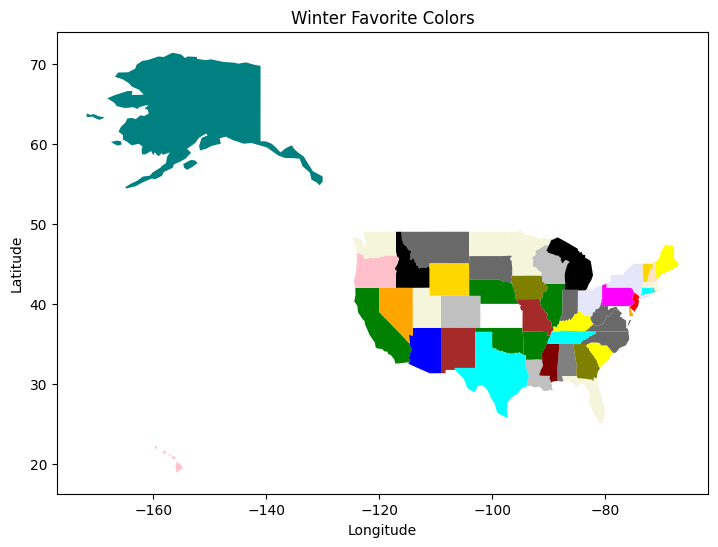

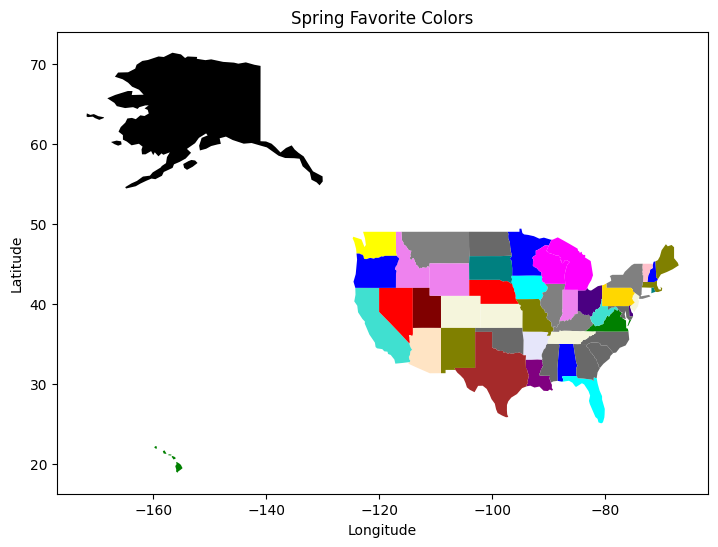

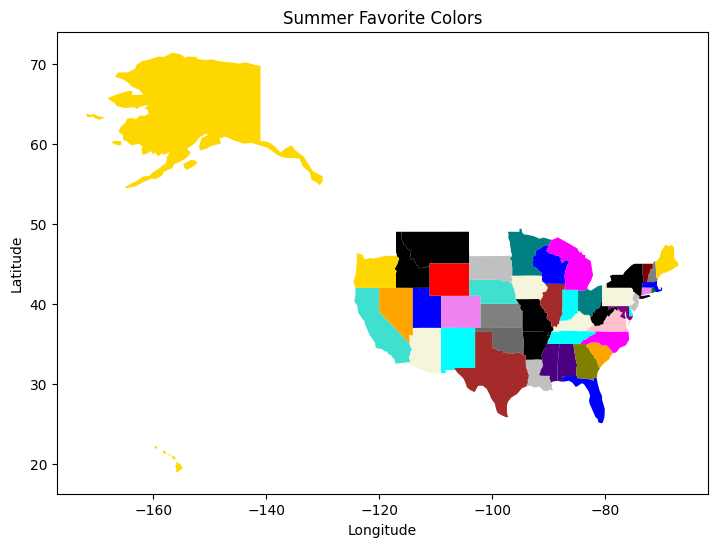

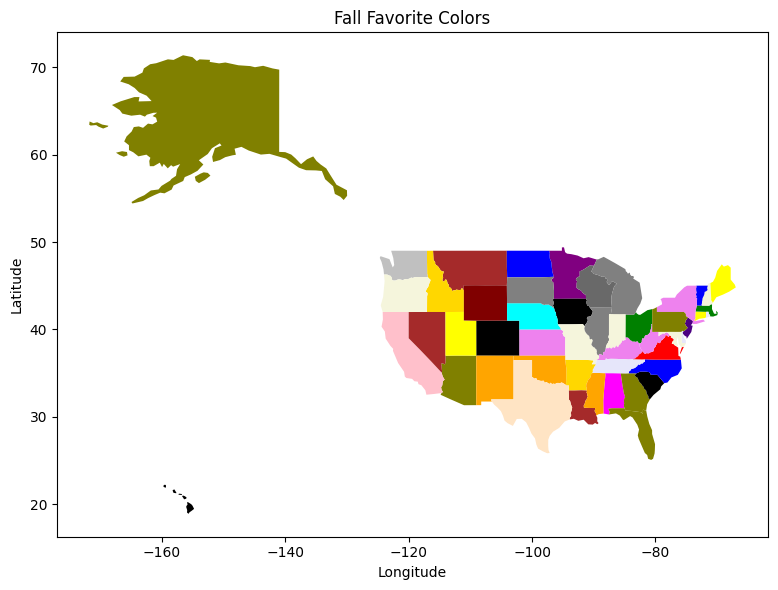

In [35]:
import geopandas as gpd
seasons = ["Winter","Spring","Summer","Fall"]
state = gpd.read_file("ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp")
state.head()
state["Location"] = state["name"]


for season in seasons:
    seasonDf = trends[trends["Season"] == season]
    colorCounts = seasonDf.groupby(['Location', 'Color']).size().reset_index(name='Count')

    indices = colorCounts.groupby('Location')['Count'].idxmax()

    colors = colorCounts.loc[indices].reset_index(drop=True)
    merged_df = pd.merge(state, colors, on='Location', suffixes=('_original', '_most_popular'))
    merged_df['Color'] = merged_df['Color'].replace({'Peach': 'bisque'})
    merged_df['Color'] = merged_df['Color'].replace({'Charcoal': 'dimgray'})

    favColors = dict(zip(merged_df['Location'], merged_df['Color']))

    fig, ax = plt.subplots(figsize=(10, 6))
    merged_df.plot(ax=ax, color=[favColors[state] for state in merged_df['Location']], legend=True)
    plt.title(season + ' Favorite Colors')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')


plt.tight_layout()
plt.show()

